In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
Data = pd.read_csv('owid-covid-data.csv')
data = Data[Data['location'] == 'Poland']
data = pd.DataFrame(data, columns = ['date', 'new_cases', 'new_deaths', 'hosp_patients', 'new_tests'])
print(data.describe())

          new_cases  new_deaths  hosp_patients      new_tests
count    631.000000  623.000000     572.000000     562.000000
mean    5397.985737  131.120385    8640.279720   41052.516014
std     7717.680840  186.926951    9252.491587   28172.717837
min        0.000000    0.000000     271.000000    7304.000000
25%      311.500000    9.000000    1786.000000   22347.250000
50%      812.000000   25.000000    2760.500000   38973.500000
75%     8338.000000  223.500000   15758.750000   51953.750000
max    35253.000000  956.000000   34864.000000  486086.000000


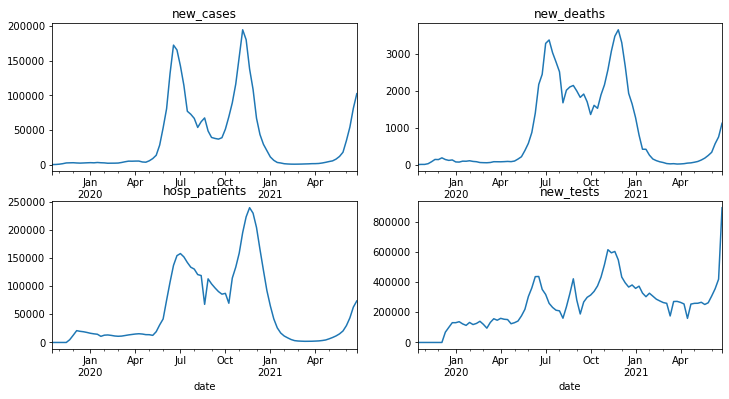

In [80]:
data['date'] = pd.to_datetime(data['date']) - pd.to_timedelta(7, unit='d')
data_weeks = data.resample('W-MON', on='date')['new_cases', 'new_deaths', 'hosp_patients', 'new_tests'].sum()
data_weeks.drop(data_weeks.tail(1).index,inplace=True) # remove last shorter week

plt.figure(figsize = (12,6))
plt.subplot(2,2,1)
plt.title('new_cases')
data_weeks['new_cases'].plot()
plt.subplot(2,2,2)
plt.title('new_deaths')
data_weeks['new_deaths'].plot()
plt.subplot(2,2,3)
plt.title('hosp_patients')
data_weeks['hosp_patients'].plot()
plt.subplot(2,2,4)
plt.title('new_tests')
data_weeks['new_tests'].plot()

plt.show()

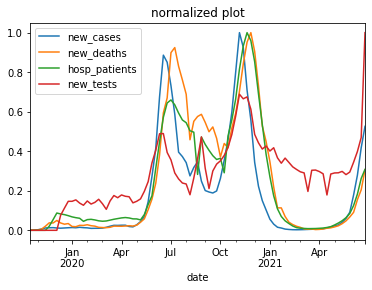

In [84]:
data_norm=(data_weeks-data_weeks.min())/(data_weeks.max()-data_weeks.min())
data_norm.plot()
plt.title('normalized plot')
plt.show()

In [91]:
data_change = data_norm/data_norm.shift(1)

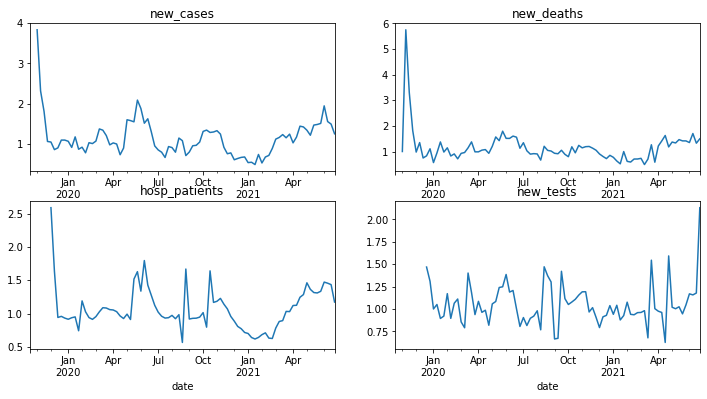

In [112]:

plt.figure(figsize = (12,6))
plt.subplot(2,2,1)
plt.title('new_cases')
data_change['new_cases'].plot()
plt.subplot(2,2,2)
plt.title('new_deaths')
data_change['new_deaths'].plot()
plt.subplot(2,2,3)
plt.title('hosp_patients')
data_change['hosp_patients'].plot()
plt.subplot(2,2,4)
plt.title('new_tests')
data_change['new_tests'].plot()

plt.show()

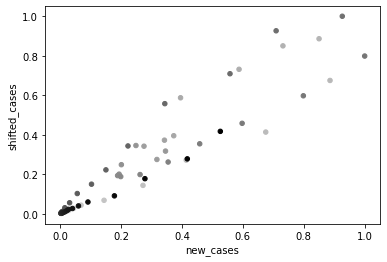

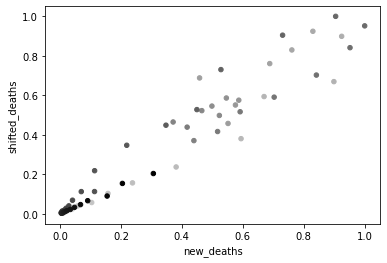

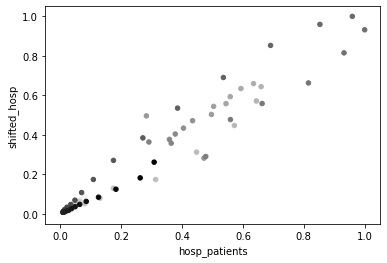

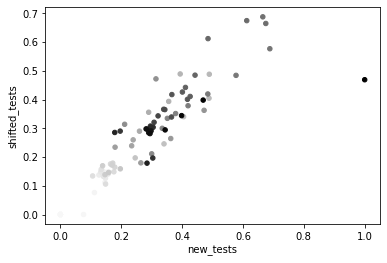

In [119]:
data_norm['shifted_cases'] = data_norm['new_cases'].shift(1)
nbr = len(data_norm['new_cases'])
data_norm.plot.scatter('new_cases', 'shifted_cases', c = np.linspace(0,1, nbr))
plt.show()

data_norm['shifted_deaths'] = data_norm['new_deaths'].shift(1)
nbr = len(data_norm['new_deaths'])
data_norm.plot.scatter('new_deaths', 'shifted_deaths', c = np.linspace(0,1, nbr))
plt.show()

data_norm['shifted_hosp'] = data_norm['hosp_patients'].shift(1)
nbr = len(data_norm['hosp_patients'])
data_norm.plot.scatter('hosp_patients', 'shifted_hosp', c = np.linspace(0,1, nbr))
plt.show()

data_norm['shifted_tests'] = data_norm['new_tests'].shift(1)
nbr = len(data_norm['new_tests'])
data_norm.plot.scatter('new_tests', 'shifted_tests', c = np.linspace(0,1, nbr))
plt.show()
